# Car purchasing model to predict the car for customer's data 

importing dataset and libraies 

In [92]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [96]:
car_df = pd.read_csv('Desktop\Car_Purchasing_Data.csv', encoding = 'ISO-8859-1')

In [98]:
car_df.head()

Customer Name                                    Customer e-mail  \
0    Martina Avila  cubilia.Curae.Phasellus@quisaccumsanconvallis.edu   
1    Harlan Barnes                                eu.dolor@diam.co.uk   
2  Naomi Rodriquez  vulputate.mauris.sagittis@ametconsectetueradip...   
3  Jade Cunningham                            malesuada@dignissim.com   
4     Cedric Leach     felis.ullamcorper.viverra@egetmollislectus.net   

        Country  Gender        Age  Annual Salary  Credit Card Debt  \
0      Bulgaria       0  41.851720    62812.09301      11609.380910   
1        Belize       0  40.870623    66646.89292       9572.957136   
2       Algeria       1  43.152897    53798.55112      11160.355060   
3  Cook Islands       1  58.271369    79370.03798      14426.164850   
4        Brazil       1  57.313749    59729.15130       5358.712177   

     Net Worth  Car Purchase Amount  
0  238961.2505          35321.45877  
1  530973.9078          45115.52566  
2  638467.1773          42925.70921  
3  548599.0524          67422.36313  
4  560304.0671          55915.46248

visualizing the data with help of seaborn pairplot feature to understand the data more

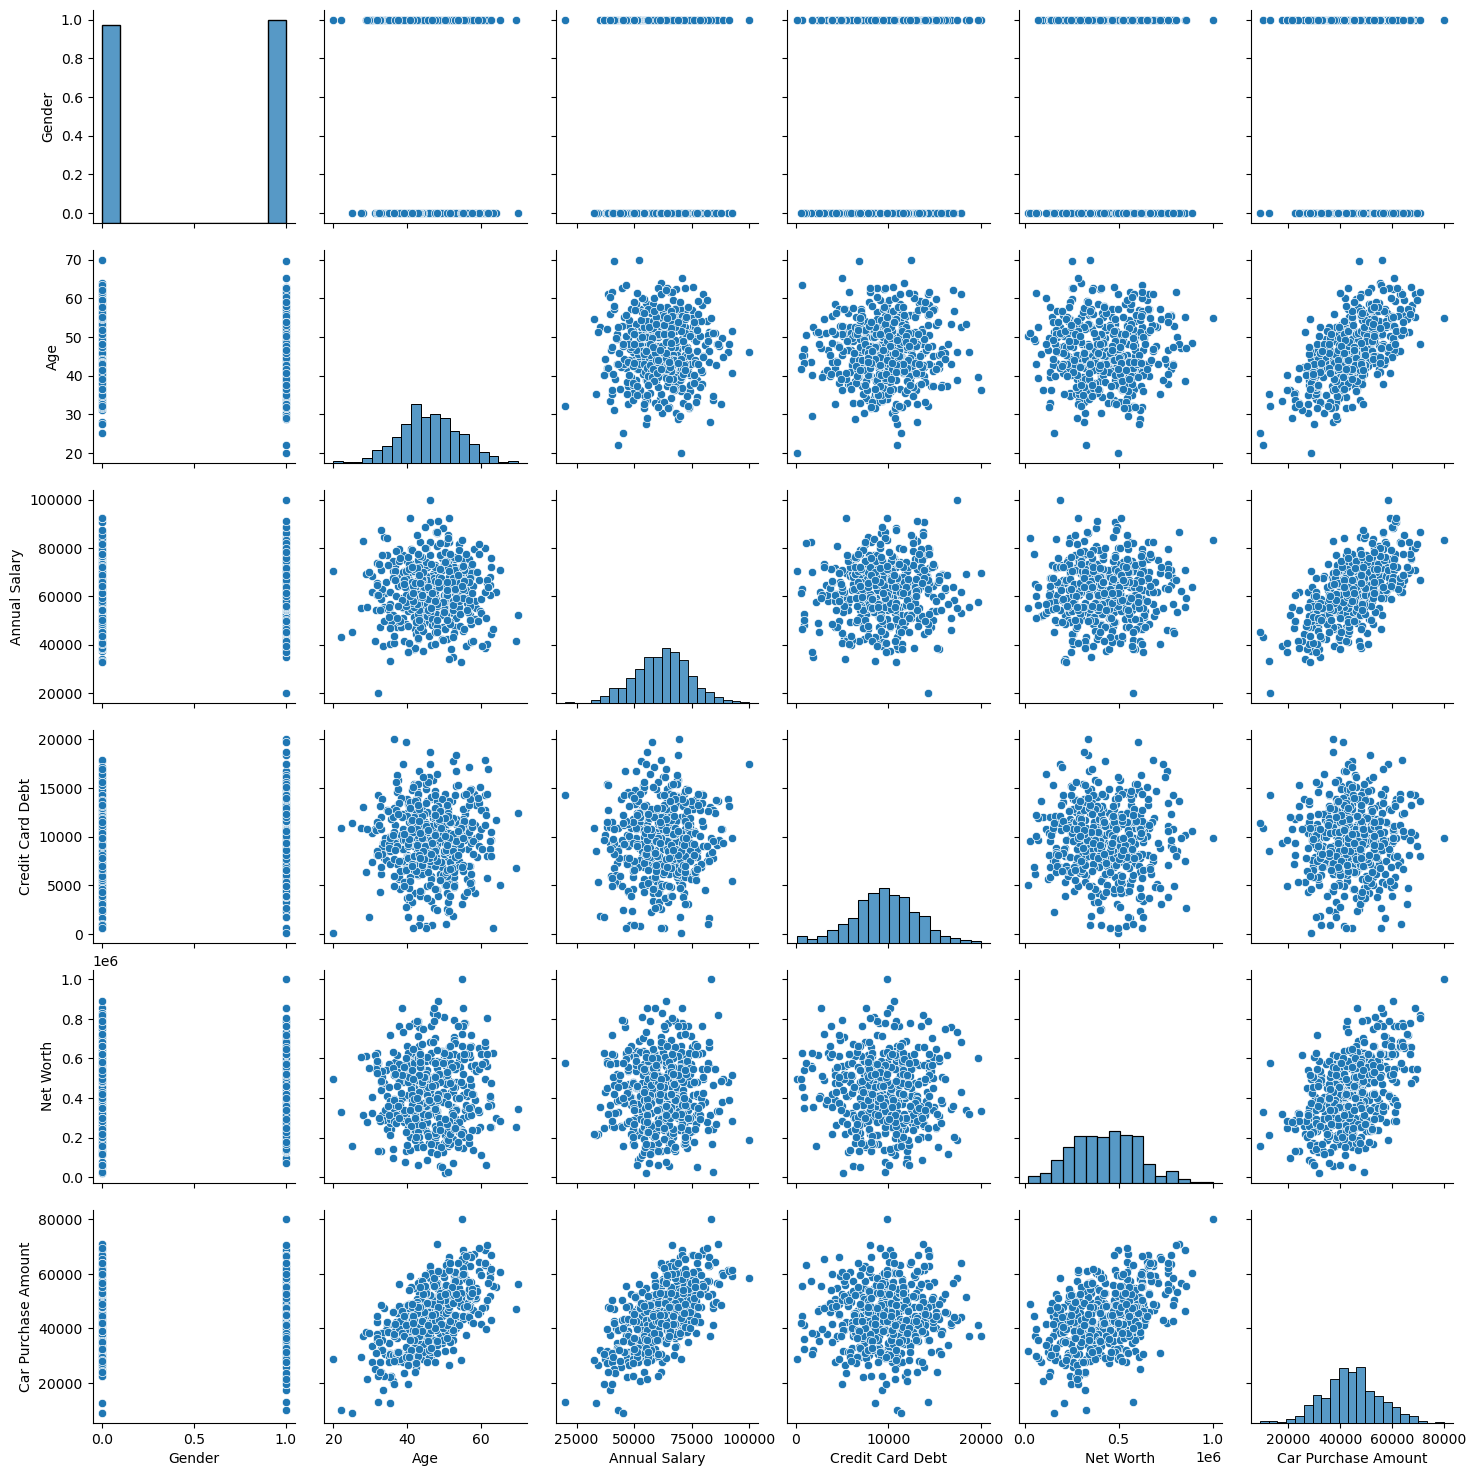

In [99]:
sns.pairplot(car_df)

# creating test and train dataset  /dataset cleaning 

In [102]:
X = car_df.drop(['Customer Name','Customer e-mail','Country','Car Purchase Amount'], axis = 1)

In [103]:
X

Gender        Age  Annual Salary  Credit Card Debt    Net Worth
0         0  41.851720    62812.09301      11609.380910  238961.2505
1         0  40.870623    66646.89292       9572.957136  530973.9078
2         1  43.152897    53798.55112      11160.355060  638467.1773
3         1  58.271369    79370.03798      14426.164850  548599.0524
4         1  57.313749    59729.15130       5358.712177  560304.0671
..      ...        ...            ...               ...          ...
495       0  41.462515    71942.40291       6995.902524  541670.1016
496       1  37.642000    56039.49793      12301.456790  360419.0988
497       1  53.943497    68888.77805      10611.606860  764531.3203
498       1  59.160509    49811.99062      14013.034510  337826.6382
499       1  46.731152    61370.67766       9391.341628  462946.4924

[500 rows x 5 columns]

In [104]:
y = car_df['Car Purchase Amount']

In [105]:
y

0      35321.45877
1      45115.52566
2      42925.70921
3      67422.36313
4      55915.46248
          ...     
495    48901.44342
496    31491.41457
497    64147.28888
498    45442.15353
499    45107.22566
Name: Car Purchase Amount, Length: 500, dtype: float64

In [106]:
X.shape

(500, 5)

In [107]:
y.shape

(500,)

In [108]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [109]:
X_scaled

array([[0.        , 0.4370344 , 0.53515116, 0.57836085, 0.22342985],
       [0.        , 0.41741247, 0.58308616, 0.476028  , 0.52140195],
       [1.        , 0.46305795, 0.42248189, 0.55579674, 0.63108896],
       ...,
       [1.        , 0.67886994, 0.61110973, 0.52822145, 0.75972584],
       [1.        , 0.78321017, 0.37264988, 0.69914746, 0.3243129 ],
       [1.        , 0.53462305, 0.51713347, 0.46690159, 0.45198622]])

In [111]:
## to reshape the y into (500,1) to scaled it into 0-1 valued 
y = y.values.reshape(-1,1)

In [112]:
y_scaled = scaler.fit_transform(y)

In [113]:
y_scaled

array([[0.37072477],
       [0.50866938],
       [0.47782689],
       [0.82285018],
       [0.66078116],
       [0.67059152],
       [0.28064374],
       [0.54133778],
       [0.54948752],
       [0.4111198 ],
       [0.70486638],
       [0.46885649],
       [0.27746526],
       [0.56702642],
       [0.57056385],
       [0.61996151],
       [0.46217916],
       [0.49157341],
       [0.50188722],
       [0.64545808],
       [0.59339372],
       [0.48453965],
       [0.53860366],
       [0.53007738],
       [0.50814651],
       [0.49841668],
       [0.3966416 ],
       [0.56467566],
       [0.6950749 ],
       [0.49287831],
       [0.12090943],
       [0.50211776],
       [0.80794216],
       [0.62661214],
       [0.43394857],
       [0.60017103],
       [0.42223485],
       [0.01538345],
       [0.37927499],
       [0.64539707],
       [0.51838974],
       [0.45869677],
       [0.26804521],
       [0.2650104 ],
       [0.84054134],
       [0.84401542],
       [0.35515157],
       [0.406

# Training the model 

In [128]:
#spliting the data into test and train 

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_scaled,y_scaled, test_size = 0.3)

In [129]:
X_train.shape

(350, 5)

In [130]:
import tensorflow.keras 
from keras.models import Sequential
from keras.layers import Dense

In [148]:
#selection of model 
model = Sequential()

#adding layer 1 with 25 nuerons  input dimenstion or input parameter and activation relu( rectified linear units)
model.add(Dense(25 , input_dim = 5, activation = 'relu'))

#layers 2 
model.add(Dense(25, activation = 'relu'))

#layer 3
model.add(Dense(1,activation = 'linear'))


In [149]:
#view or summarize the model
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 25)                150       
                                                                 
 dense_17 (Dense)            (None, 25)                650       
                                                                 
 dense_18 (Dense)            (None, 1)                 26        
                                                                 
Total params: 826
Trainable params: 826
Non-trainable params: 0
_________________________________________________________________


In [150]:
#model compile with optimizer and loss 
model.compile(optimizer = 'adam' , loss = 'mean_squared_error')

In [151]:
#fitting the model with with train data // back propagation 

epochs_hist = model.fit(X_train,y_train , epochs = 20  ,batch_size = 25 , verbose = 1, validation_split = 0.2)

Epoch 1/20
12/12 [==============================] - 1s 11ms/step - loss: 0.0983 - val_loss: 0.0469
Epoch 2/20
12/12 [==============================] - 0s 4ms/step - loss: 0.0435 - val_loss: 0.0357
Epoch 3/20
12/12 [==============================] - 0s 4ms/step - loss: 0.0296 - val_loss: 0.0234
Epoch 4/20
12/12 [==============================] - 0s 4ms/step - loss: 0.0196 - val_loss: 0.0165
Epoch 5/20
12/12 [==============================] - 0s 5ms/step - loss: 0.0148 - val_loss: 0.0147
Epoch 6/20
12/12 [==============================] - 0s 4ms/step - loss: 0.0134 - val_loss: 0.0143
Epoch 7/20
12/12 [==============================] - 0s 4ms/step - loss: 0.0124 - val_loss: 0.0128
Epoch 8/20
12/12 [==============================] - 0s 4ms/step - loss: 0.0114 - val_loss: 0.0121
Epoch 9/20
12/12 [==============================] - 0s 5ms/step - loss: 0.0104 - val_loss: 0.0108
Epoch 10/20
12/12 [==============================] - 0s 5ms/step - loss: 0.0093 - val_loss: 0.0100
Epoch 11/20
12/12 

In [152]:
epochs_hist.history.keys()

dict_keys(['loss', 'val_loss'])

Text(0.5, 1.0, 'plot diagram of loss and validation loss')

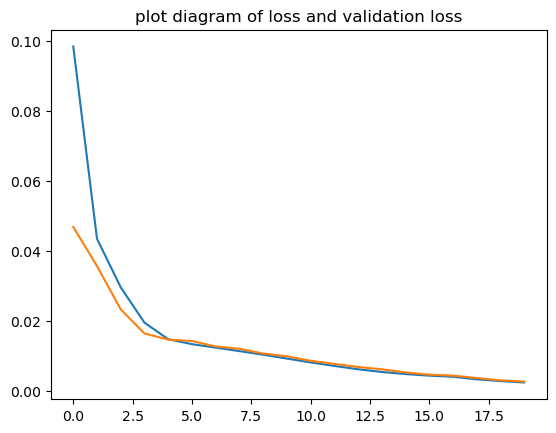

In [153]:
plt.plot(epochs_hist.history['loss'])
plt.plot(epochs_hist.history['val_loss'])
plt.title('plot diagram of loss and validation loss')

In [158]:
# to check the prediction of the model generate

# attributes are gender , age, annual salalry , cc debt , net worth 

#1	43.152897	53798.55112	11160.355060	638467.1773	42925.70921

X_test =  np.array([[1, 43 , 53798,11160 , 638467 ]])

y_predict = model.predict(X_test)
print('predict of the input is ' , y_predict)

1/1 [==============================] - 0s 19ms/step
predict of the input is  [[167380.8]]
